In [ ]:
### NOTE TO SELF:

# VISIT https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53
# for multi-class classification/work purposes

In [25]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import numpy as np
from scipy.stats import probplot
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style = 'darkgrid')

## Reading in Data

In [2]:
heart = pd.read_csv('./Data/heart.csv')
#o2sat = pd.read_csv('./Data/o2Saturation.csv')

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#o2sat.head()

## Examining Data

In [6]:
heart.shape

(303, 14)

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart.isna().sum().sort_values(ascending = False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [73]:
categorical_var = ['sex', 'exng'
                   ,'cp', 'fbs'
                   ,'rest_ecg', 'output']

quantitative_var = [var for var in heart.columns if var not in discrete_variable]
quantitative_var

['age',
 'trtbps',
 'chol',
 'restecg',
 'thalachh',
 'oldpeak',
 'slp',
 'caa',
 'thall']

### Diagnostic Plot

In [86]:
#https://www.kaggle.com/code/nishathakkar/heart-attack-prediction
def diagnostic_plot(df, var):
    
    fig = plt.figure(figsize = (18, 5))
    
    plt.subplots_adjust(left = None
                        ,bottom = None
                        ,right = None
                        ,top = None
                        ,wspace = 0.50
                        ,hspace = None)
    
    plt.suptitle(f"Distribution of Variable: {var}"
                ,fontsize = 16
                ,fontweight = 'bold')
    
    plt.subplot(1, 3, 1)
    df[var].plot(kind = 'hist'
                 ,bins = 50)
    plt.title('Histogram'
             ,fontweight = 'bold')
    
    plt.subplot(1, 3, 2)
    probplot(df[var]
             ,dist = 'norm'
             ,plot = plt)
    plt.title('Probability Plot'
             ,fontweight = 'bold')
    plt.ylabel('RM quantiles')
    
    plt.subplot(1, 3, 3)
    sns.violinplot(y = df[var]
                  ,inner = 'quartile')
    plt.title('Boxplot'
             ,fontweight = 'bold')
    plt.xlabel('Age')
    
    plt.show();

In [88]:
# for var in quantitative_var:
#     diagnostic_plot(heart, var)

In [130]:
len(quantitative_var)

9

### Distribution Plot

In [180]:
def distribution_plot(df, var):
    fig, axs = plt.subplots(figsize = (10, 4)
                            ,nrows = 1
                            ,ncols = 2)

    plt.subplots_adjust(left = None
                        ,bottom = None
                        ,right = None
                        ,top = None
                        ,wspace = 0.25
                        ,hspace = None)
    
    plt.suptitle(f"Distribution of Variable: {var}"
                ,fontsize = 16
                ,fontweight = 'bold')
        
    #subplot 1
    df[var].plot(kind = 'hist'
                ,bins = 50
                ,ax = axs[0])
    axs[0].set_title('Histogram'
                     ,fontweight = 'bold')

    #subplot 2
    sns.violinplot(x = df[var]
                  ,inner = 'quartile'
                  ,ax = axs[1])
    axs[1].set_title('Boxplot'
                     ,fontweight = 'bold')
    axs[1].set_xlabel('Age')

    plt.show();

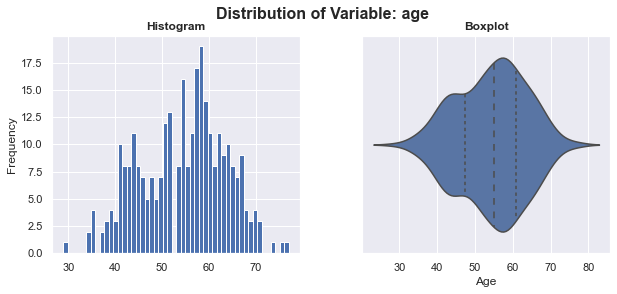

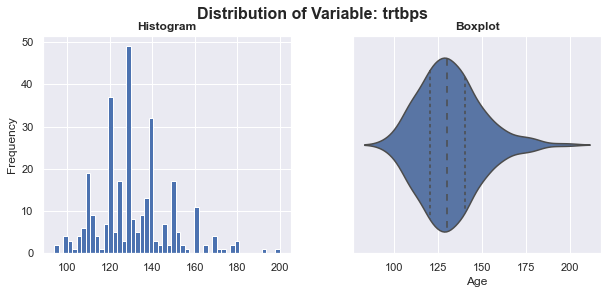

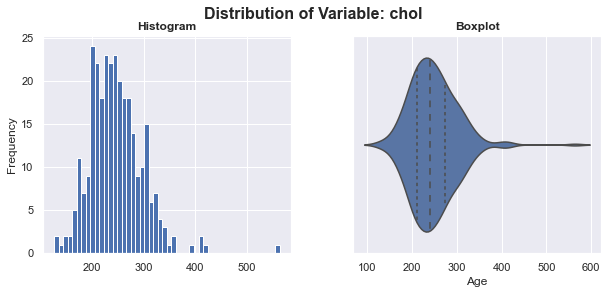

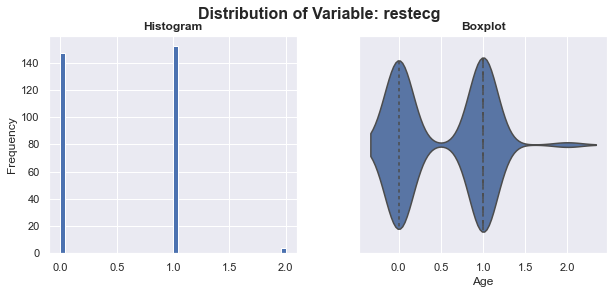

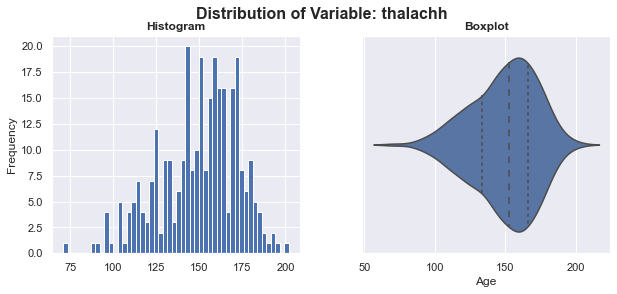

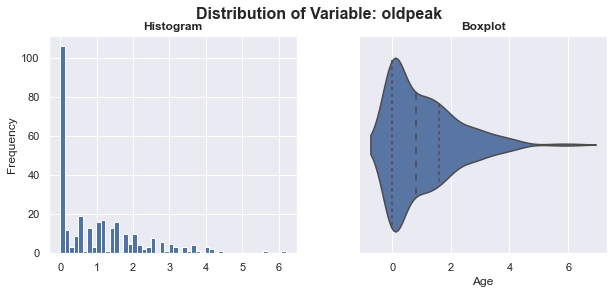

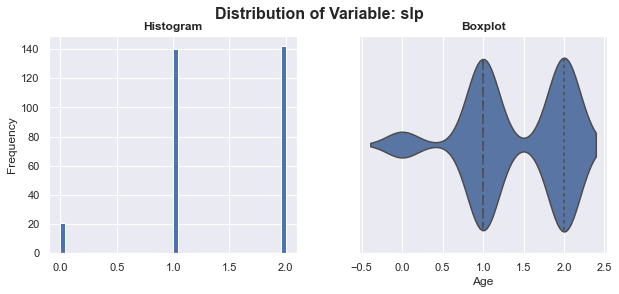

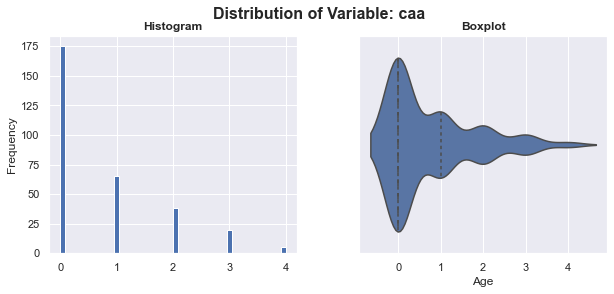

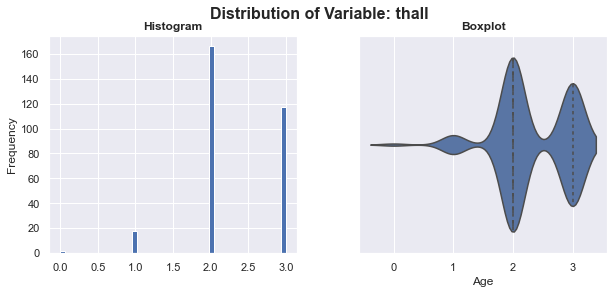

In [181]:
for var in quantitative_var:
    distribution_plot(heart, var)

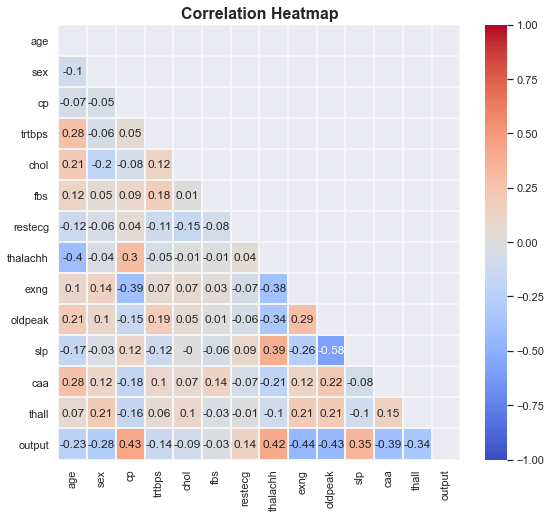

In [177]:
# and we round the values to 2 decimals
corr = np.round(heart.corr(), 2)
mask = np.triu(np.ones(corr.shape))

# plot the correlation matric using seaborn
# we use annot = true to print the correlation values


plt.figure(figsize = (9, 8))

plt.title('Correlation Heatmap'
         ,fontsize = 16
         ,fontweight = 'bold')

sns.heatmap(corr
            ,vmin = -1
            ,vmax = 1
            ,cmap = 'coolwarm'
            ,linewidth = 1
            ,linecolor = 'whitesmoke'
            ,annot = True
            ,mask = mask)

plt.xticks(rotation = 90)

plt.yticks(rotation = 0);